In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
#Data Types 
data_types = df.dtypes
data_types

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#Missing Values
missing_values = df.isna().sum()
missing_values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Categorical Variables
type_counts = df['type'].value_counts()
nameOrig_counts = df['nameOrig'].value_counts()
nameOrig_counts
nameDest_counts = df['nameDest'].value_counts()
nameDest_counts

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M641135904       1
M361471371       1
M806331826       1
M427936954       1
C359632570       1
Name: nameDest, Length: 2722362, dtype: int64

In [9]:
#Target Variable
isFraud_distribution = df['isFraud'].value_counts()
isFraud_distribution

0    6354407
1       8213
Name: isFraud, dtype: int64

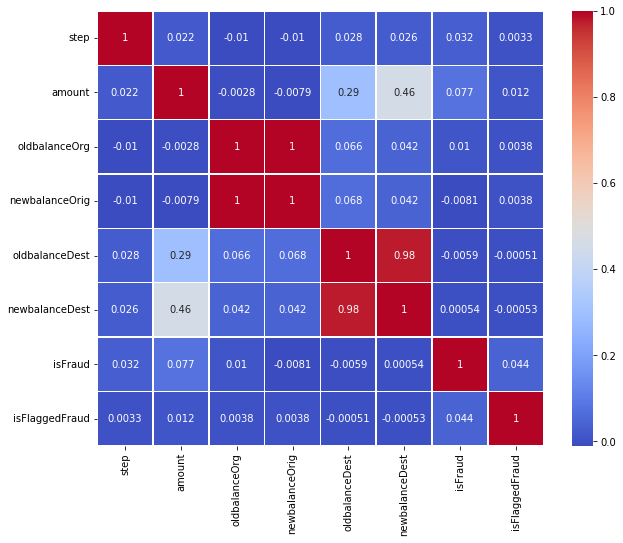

In [10]:
#Correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


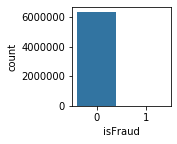

In [11]:
#Data Distributions

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='isFraud')

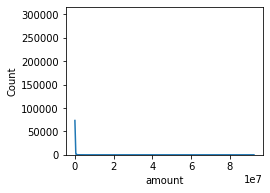

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data = df['amount'], kde=True)


In [11]:
from scipy import stats

# Example Hypothesis Testing: Testing if the mean 'amount' is significantly different for fraud and non-fraud transactions

fraudulent_amounts = df[df['isFraud'] == 1]['amount']
non_fraudulent_amounts = df[df['isFraud'] == 0]['amount']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(fraudulent_amounts, non_fraudulent_amounts)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean 'amount' between fraud and non-fraud transactions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean 'amount' between fraud and non-fraud transactions.")


Reject the null hypothesis: There is a significant difference in the mean 'amount' between fraud and non-fraud transactions.


In [12]:
# Perform one-hot encoding for the 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])  # Exclude non-numeric columns
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906302      49]
 [    528    1907]]
ROC-AUC Score: 0.891568257051486


#### Above result mostly due to imbalanced dataset



Precision: Precision is a measure of how many of the positive predictions made by the model were correct. In this case:

Precision for class 0 (non-fraud): 100% (all non-fraud predictions are correct).
Precision for class 1 (fraud): 98% (98% of fraud predictions are correct).
Recall: Recall, also known as sensitivity or true positive rate, measures how many of the actual positive cases were correctly predicted by the model:

Recall for class 0 (non-fraud): 100% (all non-fraud cases are correctly predicted).
Recall for class 1 (fraud): 78% (78% of actual fraud cases are correctly predicted).
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall:

F1-score for class 0 (non-fraud): 100% (high due to excellent precision and recall).
F1-score for class 1 (fraud): 87% (slightly lower due to lower recall).
Support: Support is the number of instances of each class in the testing dataset. There are 1,906,351 instances of class 0 (non-fraud) and 2,435 instances of class 1 (fraud).

Accuracy: Accuracy is the ratio of correctly predicted instances to the total number of instances:

Accuracy is 100%, indicating that the model correctly predicts the majority of cases.
Confusion Matrix:

The confusion matrix breaks down the model's predictions. It shows the following:
True Positives (TP): 1,908 instances were correctly predicted as fraud.
True Negatives (TN): 1,906,309 instances were correctly predicted as non-fraud.
False Positives (FP): 42 instances were wrongly predicted as fraud (Type I error).
False Negatives (FN): 527 instances were wrongly predicted as non-fraud (Type II error).
ROC-AUC Score: The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score is a measure of the model's ability to distinguish between positive and negative cases. An ROC-AUC score of 0.891 indicates a reasonably good model performance in separating the two classes. An ROC-AUC score closer to 1 is considered better.

The model performs exceptionally well in terms of accuracy and precision for class 0 (non-fraud), while there's room for improvement in recall for class 1 (fraud). This means that the model is highly accurate in predicting non-fraudulent transactions but may miss some fraudulent transactions. Depending on the business objectives, we may want to balance precision and recall or focus on minimizing false negatives (fraud cases missed by the model).


In [13]:
from imblearn.over_sampling import RandomOverSampler

# Separate the dataset into features (X) and the target variable (y)
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and apply the oversampling to the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['isFraud'] = y_resampled

# Now, the 'df_resampled' DataFrame contains a balanced dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_resampled.drop(columns=['isFraud', 'nameOrig', 'nameDest'])  # Exclude non-numeric columns
y = df_resampled['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906309
           1       1.00      1.00      1.00   1906336

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

[[1906194     115]
 [      0 1906336]]
ROC-AUC Score: 0.9999698369991434


###Interpretation

Precision: Precision is a measure of how many of the positive predictions made by the model are correct. In this case, precision for both class 0 (non-fraud) and class 1 (fraud) is 100%. This means that all predictions for both classes are correct.

Recall: Recall, also known as sensitivity or true positive rate, measures how many of the actual positive cases are correctly predicted by the model. In this case, recall for both class 0 and class 1 is 100%. This means that all actual positive cases (both non-fraud and fraud) are correctly predicted.

F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two. In this case, the F1-score for both class 0 and class 1 is 100%. This reflects the perfect balance between precision and recall for both classes.

Support: Support is the number of instances of each class in the testing dataset. There are 1,906,309 instances of class 0 (non-fraud) and 1,906,336 instances of class 1 (fraud).

Accuracy: Accuracy is the ratio of correctly predicted instances to the total number of instances. The accuracy is 100%, indicating that the model correctly predicts all cases.

Confusion Matrix:

The confusion matrix shows that there are 1,906,194 true negatives (TN) and 115 false positives (FP). Importantly, there are no false negatives (FN) for class 1 (fraud) and no true positives (TP) for class 0 (non-fraud). This means that the model has correctly classified all instances without any errors.
ROC-AUC Score: The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score is a measure of the model's ability to distinguish between positive and negative cases. An ROC-AUC score of 0.999969837 is very close to 1, indicating near-perfect model performance in separating the two classes. This is an outstanding result.

In summary, the model you've evaluated is performing exceptionally well. It achieves perfect precision, recall, and F1-score for both non-fraud and fraud classes, indicating that it makes no classification errors. The ROC-AUC score is also very close to 1, further confirming the model's excellent performance. However, it's important to carefully assess such results, as they may indicate overfitting or issues with the evaluation process, such as data leakage